<a href="https://colab.research.google.com/github/hadissuryaalamin/Sentiment-Analysis-Emotion/blob/main/Sentiment_Analysis_Emotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Load and Clean Data

In [11]:
#import library
import pandas as pd

In [12]:
#load the data
data = pd.read_csv('/content/emotions.csv')

In [13]:
data.shape

(416809, 3)

Each entry in this dataset consists of a text segment representing a Twitter message and a corresponding label indicating the predominant emotion conveyed. The emotions are classified into six categories: sadness (0), joy (1), love (2), anger (3), fear (4), and surprise (5). Whether you're interested in sentiment analysis, emotion classification, or text mining, this dataset provides a rich foundation for exploring the nuanced emotional landscape within the realm of social media.

Key Features:

In [14]:
#drop unused columns
data = data.drop(columns=['Unnamed: 0'])
data.duplicated().sum() #check duplicated

686

In [15]:
#remove duplicate
data = data.dropna()
data = data.drop_duplicates()
data.duplicated().sum() #check duplicated

0

In [16]:
data.shape

(416123, 2)

# 2. Data Preprocessing

## Tokenization, Lowercasing, Removing Stopwords, Lemmatization, Stemmed, Handling Special Characters, Handling Missing Data

In [17]:
#import library
import re
import nltk
nltk.download('stopwords', download_dir='/usr/local/share/nltk_data')
nltk.download('punkt', download_dir='/usr/local/share/nltk_data')
nltk.download('wordnet', download_dir='/usr/local/share/nltk_data')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     /usr/local/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/local/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /usr/local/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [18]:
# Initialize the WordNet Lemmatizer and Porter Stemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# Set of English stop words
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Clean text
    text = text.lower()  # Convert text to lowercase
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'www\.\S+', '', text)  # Remove URLs starting with "www."
    text = re.sub(r'[^\w\s]', '', text)  # Remove non-alphanumeric characters (excluding whitespace)
    text = re.sub(r'\w*\d\w*', '', text)  # Remove alphanumeric sequences containing digits

    # Tokenization
    tokens = word_tokenize(text)

    # Lemmatization and stemming
    tokens = [stemmer.stem(lemmatizer.lemmatize(word.lower())) for word in tokens if word.lower() not in stop_words]

    return ' '.join(tokens)

# Assuming 'data' is a DataFrame containing a column named 'text'
data['processed_text'] = data['text'].apply(preprocess_text)

In [19]:
data = data.dropna()
data.shape

(416123, 3)

## Labeling

In [20]:
#import library
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk import bigrams, trigrams
from collections import Counter


In [21]:
#mapping label
mapping = {0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}
data['Emotion'] = data['label'].map(mapping)

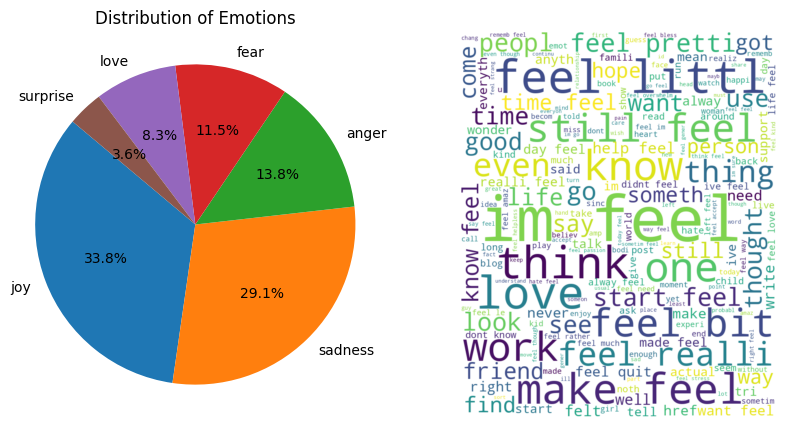

In [22]:
# Calculate the value counts of emotions
emotion_counts = data['Emotion'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)  # Create a subplot for the pie chart
plt.pie(emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Emotions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Generate word cloud

wordcloud = WordCloud(width=800, height=980, background_color='white').generate(' '.join(data['processed_text']))
plt.subplot(1, 2, 2)  # Create a subplot for the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Show the plot
plt.show()

# 3. Feature Extraction

In [23]:
#import library
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(data['processed_text'])
y = data['Emotion']

# 4. Model Selection and Training

In [25]:
#import library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# 5. Evaluation

In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       anger       0.88      0.88      0.88      5788
        fear       0.82      0.83      0.83      4770
         joy       0.89      0.91      0.90     14020
        love       0.77      0.69      0.73      3361
     sadness       0.92      0.92      0.92     12176
    surprise       0.72      0.70      0.71      1498

    accuracy                           0.88     41613
   macro avg       0.83      0.82      0.83     41613
weighted avg       0.87      0.88      0.87     41613



# 6. Inference

In [ ]:
def predict_sentiment(tweet):
    processed_tweet = preprocess_text(tweet)
    vectorized_tweet = tfidf_vectorizer.transform([processed_tweet])
    sentiment = model.predict(vectorized_tweet)[0]
    return sentiment

# 7. Testing

In [ ]:
# Example usage
new_tweet = "after my friend is married, I feel lonely" #test here
predicted_sentiment = predict_sentiment(new_tweet)
print("Predicted Sentiment:", predicted_sentiment)

Predicted Sentiment: sadness
